In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, to_date
from functools import reduce

In [0]:

dfs = []

# Looping through the years 2014 to 2024

for year in range(2014, 2025):
    
    file_path = f"dbfs:/FileStore/Shannon_all_year/dataPreprocessed/{year}.csv"
    df_year = spark.read.format("csv").option("header", "true").load(file_path)
    
    # Converting the date column to a DateType
    df_year = df_year.withColumn("date", to_date(col("date")))
    
    
    avg_temp_per_day_year = df_year.groupBy("date").agg({"airtemp": "avg"})
    
    # Append the DataFrame to the list
    dfs.append(avg_temp_per_day_year)

# Concatenate the DataFrames for all years
average_temp_all_years = reduce(lambda df1, df2: df1.union(df2), dfs)

# Order the result by date
average_temp_all_years = average_temp_all_years.orderBy("date")

# Show the result
average_temp_all_years.show(100)

+----------+------------------+
|      date|      avg(airtemp)|
+----------+------------------+
|2014-01-01|               5.9|
|2014-01-02| 7.073611111111112|
|2014-01-03| 6.419444444444443|
|2014-01-04| 3.622222222222222|
|2014-01-05| 7.190277777777778|
|2014-01-06|             8.475|
|2014-01-07| 8.066666666666666|
|2014-01-08| 6.030434782608697|
|2014-01-09| 4.743055555555556|
|2014-01-10| 5.926388888888889|
|2014-01-11| 3.688732394366197|
|2014-01-12| 7.656944444444444|
|2014-01-13|3.9185714285714277|
|2014-01-14| 5.161971830985915|
|2014-01-15| 8.223611111111113|
|2014-01-16| 5.626760563380282|
|2014-01-17| 5.984722222222222|
|2014-01-18| 4.219444444444445|
|2014-01-19| 4.308333333333334|
|2014-01-20|5.2333333333333325|
|2014-01-21| 7.414084507042255|
|2014-01-22| 7.018309859154931|
|2014-01-23| 6.752777777777778|
|2014-01-24|10.368055555555555|
|2014-01-25| 8.123611111111112|
|2014-01-26|6.3791666666666655|
|2014-01-27| 6.687499999999998|
|2014-01-28|6.4430555555555555|
|2014-01

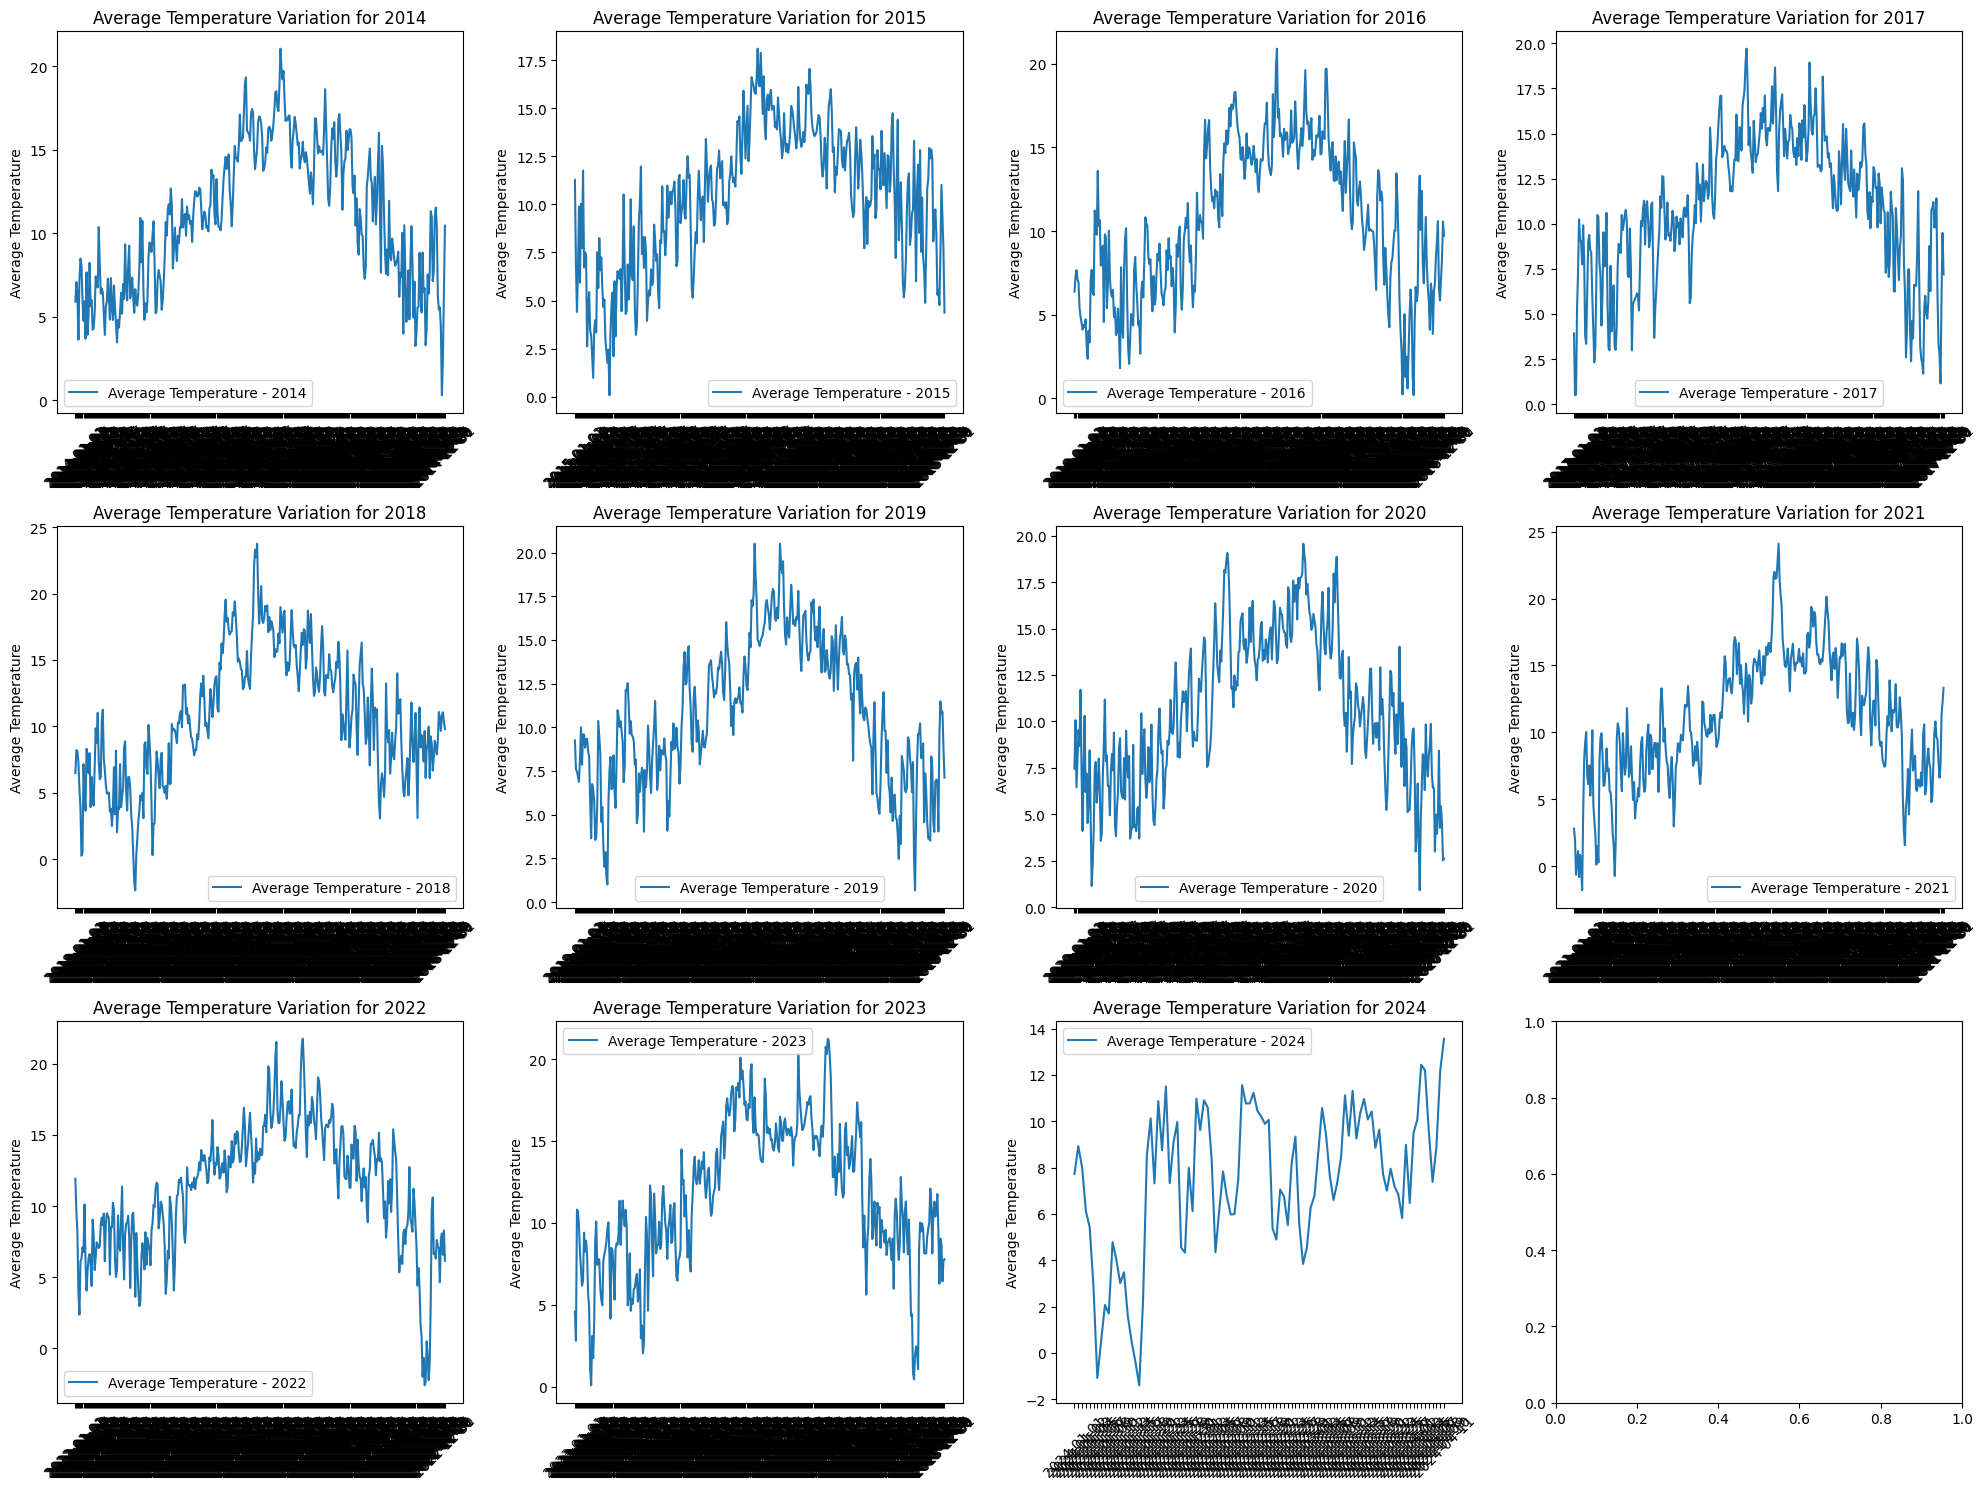

In [0]:


#Subplots feature
num_years = 11  # Number of years from 2014 to 2024
num_rows = 3    # Number of rows
num_cols = 4    # Number of columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))


for i, year in enumerate(range(2014, 2025)):
    # Filter the DataFrame for the current year
    avg_temp_year = average_temp_all_years.filter((col("date") >= f"{year}-01-01") & (col("date") <= f"{year}-12-31"))
    
    # Extract the date and temperature values
    dates = avg_temp_year.select("date").collect()
    temperatures = avg_temp_year.select("avg(airtemp)").collect()
    
    # Convert dates to string format
    dates = [str(row.date) for row in dates]
    
    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Plot the data
    axes[row_index, col_index].plot(dates, temperatures, label=f"Average Temperature - {year}")
    axes[row_index, col_index].set_xlabel("Date")
    axes[row_index, col_index].set_ylabel("Average Temperature")
    axes[row_index, col_index].set_title(f"Average Temperature Variation for {year}")
    axes[row_index, col_index].tick_params(axis='x', rotation=45)
    axes[row_index, col_index].legend()
    axes[row_index, col_index].grid(False)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()